DEEP LEARNING

LAB-7

PRANSHU PARATE 

202211063

CIFAR10 DATASET

In [1]:
#Import the packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,BatchNormalization, Conv2D, MaxPooling2D, Flatten, Add, Activation, Concatenate, ReLU
from keras.utils import to_categorical, plot_model
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import struct

SKIP CONNECTION

In [2]:
#load the dataset
from tensorflow.keras.datasets import cifar10

(train_x,train_y), (test_x, test_y) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
#Preprocess the data
train_x = train_x / 255.0
test_x = test_x / 255.0

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [4]:
#define the skip connection
def SKIP_CNN(input_size):
  inputs = Input(shape = input_size)

  z = Conv2D(filters=8, kernel_size=3, padding='same', activation="relu")(inputs)
  # x = Conv2D(filters=,kernel_size=3,padding="same", activation="relu")(x)
  x = Conv2D(filters=8,kernel_size=3,padding="same", activation="relu")(z)
  
  x = Add()([x, z])
  x = Activation(activation='relu')(x)

  z = Conv2D(filters=10, kernel_size=3, padding='same', activation="relu")(x)
  # x = Conv2D(filters=32,kernel_size=3,padding="same", activation="relu")(x)
  x = Conv2D(filters=10,kernel_size=3,padding="same", activation="relu")(z)

  x = Add()([x, z])
  x = Activation(activation='relu')(x)

  x = Flatten()(x)

  x = Dense(32,activation = 'relu')(x)
  x = Dense(16,activation = 'relu')(x)

  outputs = Dense(10,activation = 'softmax')(x)
  
  model = Model(inputs,outputs)
  model.summary()

  return model

In [5]:
train_x.shape

(50000, 32, 32, 3)

In [25]:
train_y.shape

(50000, 10)

In [26]:
test_x.shape

(10000, 32, 32, 3)

In [27]:
test_y.shape

(10000, 10)

In [6]:
#Print the model summary
model1 = SKIP_CNN((32, 32, 3))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 8)    224         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 8)    584         ['conv2d[0][0]']                 
                                                                                                  
 add (Add)                      (None, 32, 32, 8)    0           ['conv2d_1[0][0]',               
                                                                  'conv2d[0][0]']             

In [7]:
#Compile the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
#Train the model
history1 = model1.fit(train_x, train_y,
          validation_data = (test_x, test_y),
          epochs = 5,
          batch_size = 512)

Epoch 1/5
98/98 [==============================] - 119s 1s/step - loss: 2.0564 - accuracy: 0.2267 - val_loss: 1.7856 - val_accuracy: 0.3466
Epoch 2/5
98/98 [==============================] - 119s 1s/step - loss: 1.6623 - accuracy: 0.3939 - val_loss: 1.5691 - val_accuracy: 0.4340
Epoch 3/5
98/98 [==============================] - 113s 1s/step - loss: 1.5123 - accuracy: 0.4504 - val_loss: 1.4721 - val_accuracy: 0.4701
Epoch 4/5
98/98 [==============================] - 111s 1s/step - loss: 1.4272 - accuracy: 0.4836 - val_loss: 1.4035 - val_accuracy: 0.4928
Epoch 5/5
98/98 [==============================] - 117s 1s/step - loss: 1.3692 - accuracy: 0.5078 - val_loss: 1.3660 - val_accuracy: 0.5038


In [9]:
#Evaluate the model and plot the graph
def get_performance(history, y_true, y_pred, title):
  fig, axs = plt.subplots(1, 2)

  fig.set_figheight(5)
  fig.set_figwidth(15)

  fig.suptitle(title)
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')


  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.show()

  print(classification_report(y_true, y_pred), end = '\n\n')

In [10]:
y_pred = model1.predict(test_x)

313/313 [==============================] - 8s 25ms/step


In [11]:
y_pred = [np.argmax(y_pred[i]) for i in range(y_pred.shape[0])]
y_true = [np.argmax(test_y[i]) for i in range(test_y.shape[0])]

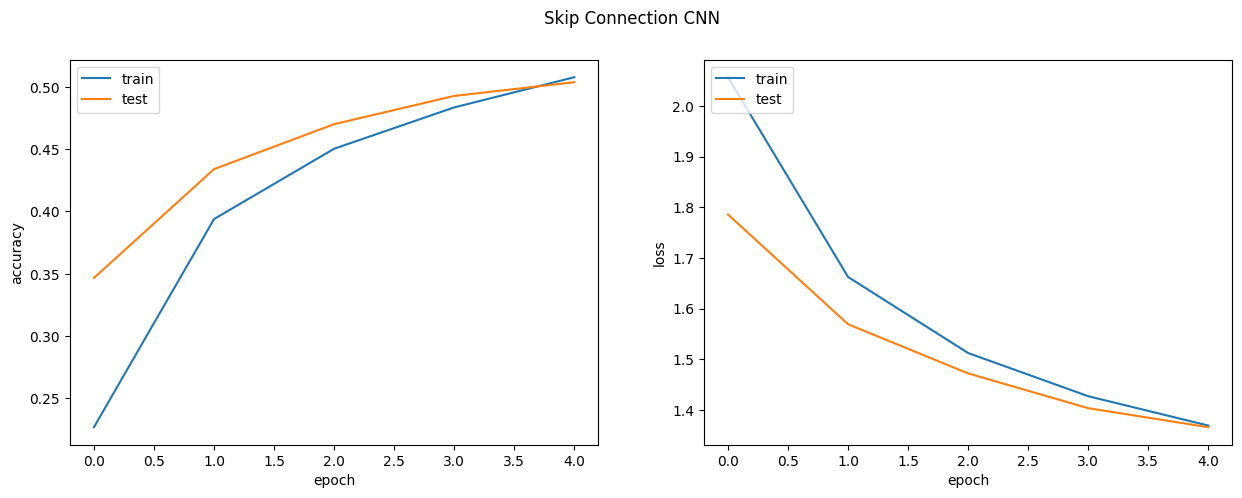

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1000
           1       0.65      0.66      0.66      1000
           2       0.35      0.37      0.36      1000
           3       0.34      0.29      0.32      1000
           4       0.46      0.33      0.38      1000
           5       0.42      0.36      0.39      1000
           6       0.52      0.60      0.56      1000
           7       0.61      0.57      0.59      1000
           8       0.56      0.72      0.63      1000
           9       0.52      0.60      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000




In [12]:
get_performance(history1, y_true, y_pred, 'Skip Connection CNN')

ResNet

In [13]:
#define ResNet Architecture using resnet block
def ResNET(input_size):
  def residual_block(x, filters):
    fx = Conv2D(filters = filters, kernel_size=3,padding="same", activation="relu")(x)
    fx = BatchNormalization()(fx)
    fx = Conv2D(filters = filters, kernel_size=3,padding="same", activation="relu")(fx)
    fx = BatchNormalization()(fx)
    out = Concatenate()([x,fx])
    out = ReLU()(out)
    return out

  inputs = Input(shape = input_size)
  x = Conv2D(filters=4, kernel_size=3, padding='same', activation="relu")(inputs)
  x = residual_block(x, 6)

  x = Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu')(x)
  x = residual_block(x, 8)

  x = Flatten()(x)
  x = Dense(units=84, activation="relu")(x)
  
  dense = Dense(units=10, activation="softmax")(x)

  model = Model(inputs=inputs, outputs = dense)

  model.summary()
  return model

In [14]:
#Load the CIFAR-10 dataset
(train_x,train_y), (test_x, test_y) = cifar10.load_data()

# Preprocess the data
train_x = train_x / 255.0
test_x = test_x / 255.0

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [15]:
#Print the model summary
model2 = ResNET((32,32,3))

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 32, 32, 4)    112         ['input_2[0][0]']                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 32, 32, 6)    222         ['conv2d_4[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 6)   24          ['conv2d_5[0][0]']               
 alization)                                                                                 

In [16]:
#Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
#Train the mode
history2 = model2.fit(train_x, train_y,
          validation_data = (test_x, test_y),
          epochs = 5,
          batch_size = 512)

Epoch 1/5
98/98 [==============================] - 205s 2s/step - loss: 2.1291 - accuracy: 0.2459 - val_loss: 2.2791 - val_accuracy: 0.1244
Epoch 2/5
98/98 [==============================] - 231s 2s/step - loss: 1.5809 - accuracy: 0.4307 - val_loss: 2.2433 - val_accuracy: 0.1598
Epoch 3/5
98/98 [==============================] - 231s 2s/step - loss: 1.3142 - accuracy: 0.5375 - val_loss: 2.2823 - val_accuracy: 0.1435
Epoch 4/5
98/98 [==============================] - 248s 3s/step - loss: 1.1529 - accuracy: 0.5950 - val_loss: 2.2273 - val_accuracy: 0.2029
Epoch 5/5
98/98 [==============================] - 235s 2s/step - loss: 1.0510 - accuracy: 0.6315 - val_loss: 2.0208 - val_accuracy: 0.2712


313/313 [==============================] - 13s 42ms/step


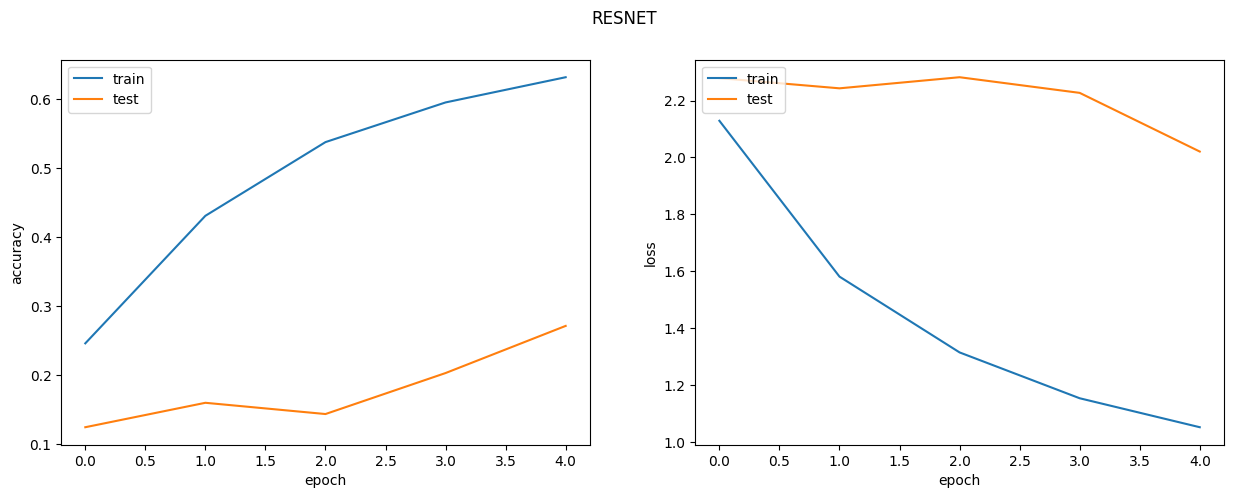

              precision    recall  f1-score   support

           0       0.30      0.65      0.41      1000
           1       0.54      0.34      0.41      1000
           2       0.47      0.09      0.15      1000
           3       0.17      0.60      0.27      1000
           4       0.26      0.10      0.14      1000
           5       0.14      0.28      0.19      1000
           6       0.83      0.06      0.11      1000
           7       0.52      0.07      0.13      1000
           8       0.48      0.47      0.48      1000
           9       0.72      0.06      0.10      1000

    accuracy                           0.27     10000
   macro avg       0.45      0.27      0.24     10000
weighted avg       0.45      0.27      0.24     10000




In [18]:
#Evaluate the model and plot the graph
y_pred = model2.predict(test_x)

y_pred = [np.argmax(y_pred[i]) for i in range(y_pred.shape[0])]
y_true = [np.argmax(test_y[i]) for i in range(test_y.shape[0])]

get_performance(history2, y_true, y_pred, 'RESNET')

DenseNet

In [19]:
#define DenseNet Architecture using dense block
def DenseNET(input_size):
  def dense_block(x, prev_out, filters):
    fx = Conv2D(filters = filters, kernel_size=3,padding="same", activation="relu")(x)
    fx = BatchNormalization()(fx)
    fx = Conv2D(filters = filters, kernel_size=3,padding="same", activation="relu")(fx)
    fx = BatchNormalization()(fx)
    prev_out.append(fx)
    out = Concatenate()(prev_out)
    out = ReLU()(out)
    return out

  prev_out = []
  inputs = Input(shape = input_size)

  x = Conv2D(filters=2, kernel_size=3, padding='same', activation="relu")(inputs)
  x = dense_block(x, prev_out, 4)

  x = Conv2D(filters=4, kernel_size=3, padding='same', activation="relu")(x)
  x = dense_block(x, prev_out, 6)

  x = Conv2D(filters=6, kernel_size=3, padding='same', activation="relu")(x)
  x = dense_block(x, prev_out, 8)

  x = Flatten()(x)
  x = Dense(units=84, activation="relu")(x)
  
  dense = Dense(units=10, activation="softmax")(x)

  model = Model(inputs=inputs, outputs = dense)

  model.summary()
  return model

In [20]:
#Print the model summary
model3 = DenseNET((32,32,3))

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 32, 32, 2)    56          ['input_3[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 32, 32, 4)    76          ['conv2d_10[0][0]']              
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 32, 32, 4)   16          ['conv2d_11[0][0]']              
 rmalization)                                                                               

In [21]:
#Load the dataset
(train_x,train_y), (test_x, test_y) = cifar10.load_data()

#Preprocess the data
train_x = train_x / 255.0
test_x = test_x / 255.0

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [22]:
#Compile the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
#Train the model
history3 = model3.fit(train_x, train_y,
          validation_data = (test_x, test_y),
          epochs = 5,
          batch_size = 512)

Epoch 1/5
98/98 [==============================] - 337s 3s/step - loss: 2.3000 - accuracy: 0.1863 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 2/5
98/98 [==============================] - 286s 3s/step - loss: 1.8425 - accuracy: 0.3136 - val_loss: 2.3962 - val_accuracy: 0.1001
Epoch 3/5
98/98 [==============================] - 283s 3s/step - loss: 1.5039 - accuracy: 0.4417 - val_loss: 2.8492 - val_accuracy: 0.1152
Epoch 4/5
98/98 [==============================] - 281s 3s/step - loss: 1.3559 - accuracy: 0.4940 - val_loss: 2.8646 - val_accuracy: 0.1450
Epoch 5/5
98/98 [==============================] - 283s 3s/step - loss: 1.2698 - accuracy: 0.5265 - val_loss: 2.2699 - val_accuracy: 0.2511


313/313 [==============================] - 20s 65ms/step


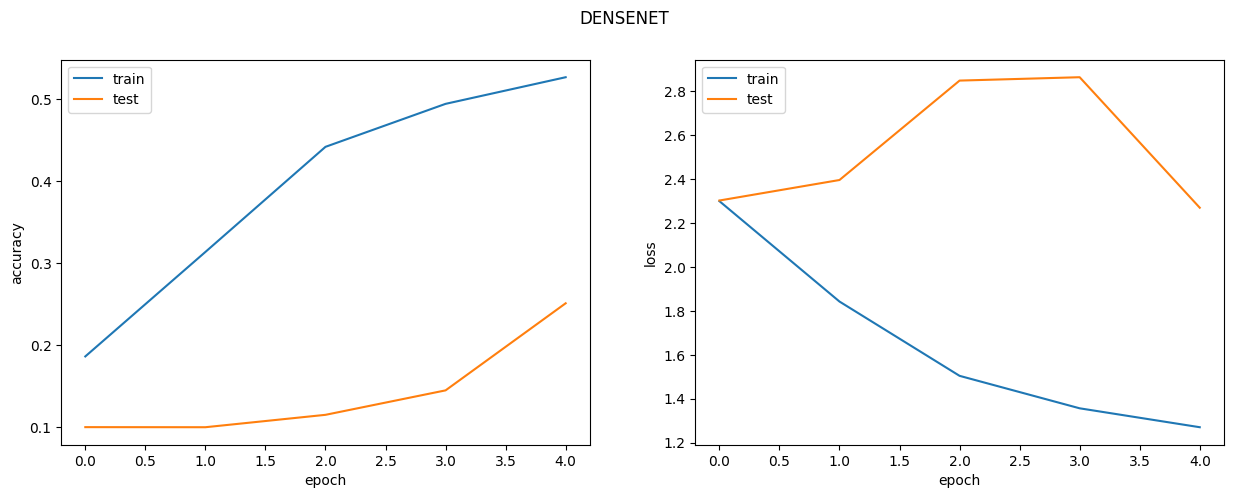

              precision    recall  f1-score   support

           0       0.54      0.27      0.36      1000
           1       0.71      0.08      0.14      1000
           2       0.17      0.73      0.28      1000
           3       0.06      0.02      0.03      1000
           4       0.15      0.06      0.08      1000
           5       0.30      0.10      0.15      1000
           6       0.23      0.73      0.35      1000
           7       0.18      0.02      0.03      1000
           8       0.71      0.48      0.57      1000
           9       0.78      0.02      0.04      1000

    accuracy                           0.25     10000
   macro avg       0.38      0.25      0.20     10000
weighted avg       0.38      0.25      0.20     10000




In [24]:
#Evaluate the model
y_pred = model3.predict(test_x)

y_pred = [np.argmax(y_pred[i]) for i in range(y_pred.shape[0])]
y_true = [np.argmax(test_y[i]) for i in range(test_y.shape[0])]

get_performance(history3, y_true, y_pred, 'DENSENET')